In [ ]:
# Importing modules
import pandas as pd
import os
os.chdir('..')

In [ ]:
import math
import random
from collections import defaultdict
from pprint import pprint

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set global styles for plots
sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize': (16,9)})

In [ ]:
!pip install PyDrive
!pip install gensim
!pip install pyldavis
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import json
import re
import gzip
import spacy

import gensim
from gensim import corpora

import pyLDAvis
#import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import nltk
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ds = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset project.csv', encoding='utf-8')

In [ ]:
ds.head()

,Unnamed: 0,ITEM,ITEMTYPE,BRANDNAME,REVIEW,RATING
0,1,Watches,FastTrack,Tees Analog Watch,Waste product,1
1,2,Watches,FastTrack,Tees Analog Watch,dial is small. only suit for women's.,1
2,3,Watches,FastTrack,Tees Analog Watch,The product was stopped it's working after 3 months. I not even use it roughly. I dono y its hppn but now it s a big question to believe and buy branded watch in starting price..,1
3,4,Watches,FastTrack,Tees Analog Watch,My product is so bad.,1
4,5,Watches,FastTrack,Tees Analog Watch,Stylish watch at low cost,1


In [ ]:
# Remove the columns
ds = ds.drop(columns=['Unnamed: 0', 'ITEM', 'ITEMTYPE', 'BRANDNAME'], axis=1).sample(100)
# Print out the first rows of papers
ds.head()

,REVIEW,RATING
5579,good product from fastrack,5
6421,Fantastic,5
10427,Excellent product I'm very happy,5
1744,Not reach a expectations,3
1045,Length is very small. not good.,2


In [ ]:
# Load the regular expression library
import re
# Remove punctuation
ds['review_text_processed'] = \
ds['REVIEW'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
ds['review_text_processed'] = \
ds['review_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
ds['review_text_processed'].head()

5579           good product from fastrack
6421                            fantastic
10427    excellent product i'm very happy
1744             not reach a expectations
1045        length is very small not good
Name: review_text_processed, dtype: object

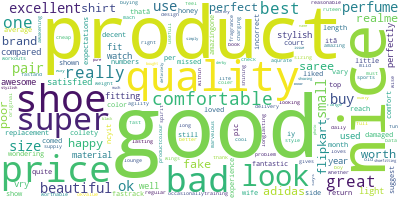

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(ds['review_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = ds.review_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['good', 'product', 'fastrack']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus)

[[(0, 1), (1, 1), (2, 1)], [(3, 1)], [(2, 1), (4, 1), (5, 1)], [(6, 1), (7, 1)], [(1, 1), (8, 1), (9, 1)], [(10, 1)], [(11, 1), (12, 1)], [(13, 1), (14, 1), (15, 1)], [(1, 2), (13, 1), (14, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1)], [(19, 1), (22, 1), (23, 1)], [(1, 1)], [(5, 1), (24, 1), (25, 1)], [(26, 1)], [(1, 1), (2, 1), (27, 1)], [(9, 1), (24, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(34, 1)], [(1, 1), (33, 1), (35, 1), (36, 1)], [(1, 1), (2, 1)], [(1, 2), (2, 1), (18, 1), (35, 1)], [(18, 1), (37, 1), (38, 1), (39, 1)], [(37, 1), (40, 1)], [(17, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1)], [(1, 1), (2, 1), (9, 1), (33, 1), (51, 1)], [(52, 1), (53, 1)], [(24, 1), (54, 1)], [(1, 1), (55, 1)], [(35, 1), (56, 1), (57, 1), (58, 1)], [(37, 1), (59, 1)], [(60, 1), (61, 1)], [(2, 1), (24, 2), (62, 1)], [(63, 1)], [(2, 1), (64, 1)], [(24, 1)], [(1, 1), (65, 1)], [(18, 1), (37, 1), (66, 1)], [(2, 1), (19, 

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.157*"good" + 0.097*"product" + 0.073*"nice" + 0.025*"shoes" + '
  '0.025*"really" + 0.025*"small" + 0.025*"ok" + 0.013*"quality" + '
  '0.013*"super" + 0.013*"looks"'),
 (1,
  '0.078*"nice" + 0.059*"shoe" + 0.040*"product" + 0.040*"great" + '
  '0.040*"price" + 0.021*"good" + 0.021*"fitting" + 0.021*"perfectly" + '
  '0.021*"size" + 0.021*"within"'),
 (2,
  '0.038*"quality" + 0.038*"could" + 0.038*"better" + 0.038*"wise" + '
  '0.038*"material" + 0.038*"way" + 0.038*"satisfied" + 0.038*"best" + '
  '0.038*"well" + 0.038*"amazing"'),
 (3,
  '0.108*"good" + 0.055*"product" + 0.037*"bad" + 0.037*"great" + '
  '0.037*"quality" + 0.037*"comfortable" + 0.019*"well" + 0.019*"problem" + '
  '0.019*"shoe" + 0.019*"fits"'),
 (4,
  '0.082*"quality" + 0.082*"bad" + 0.056*"product" + 0.056*"light" + '
  '0.029*"good" + 0.029*"nice" + 0.029*"comfortable" + 0.029*"beautiful" + '
  '0.029*"shoe" + 0.029*"ok"'),
 (5,
  '0.064*"good" + 0.049*"like" + 0.033*"quality" + 0.033*"look" + 0.033*"pai

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.136158 -0.005749       1        1  18.592470
9     -0.071911  0.092024       2        1  12.789082
8      0.141501  0.069788       3        1  12.489548
5      0.086063 -0.067580       4        1  12.450778
1     -0.031144  0.103923       5        1  11.121320
3     -0.082887 -0.119140       6        1  10.884926
4     -0.031063 -0.058200       7        1   6.474553
7     -0.021210  0.053354       8        1   6.282605
2      0.091539 -0.048454       9        1   4.497507
6      0.055271 -0.019965      10        1   4.417212, topic_info=       Term       Freq      Total Category  logprob  loglift
37      bad   4.000000   4.000000  Default  30.0000  30.0000
2   product  16.000000  16.000000  Default  29.0000  29.0000
18  quality   7.000000   7.000000  Default  28.0000  28.0000
61    price   5.000000   5.000000  Default  27.0000  27.0000
32     shoe   4.000000   4.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
91  awesome   0.053149   1.989869  Topic10  -5.6556  -0.5031
83       ok   0.053148   2.761255  Topic10  -5.6557  -0.8307
19   really   0.053143   3.502956  Topic10  -5.6557  -1.0687
56    great   0.053142   3.416536  Topic10  -5.6558  -1.0438
36  perfect   0.053141   1.972819  Topic10  -5.6558  -0.4946

[427 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
41        4  0.542445     adidas
41       10  0.542445     adidas
123       1  0.712318    agility
80        3  0.503076       also
80        4  0.503076       also
...     ...       ...        ...
39        2  0.509956      worth
39        6  0.509956      worth
86        8  0.834247  worthable
105       2  0.506347       year
105       3  0.506347       year

[257 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 9, 6, 2, 4, 5, 8, 3, 7])